## Prediction of data analyst job application probability

Based on the size,sector,type of ownership and revenue, the application probability is predicted.

In [51]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib 
from matplotlib import pyplot as plt

In [52]:
df = pd.read_csv('/kaggle/input/data-analyst-jobs/DataAnalyst.csv')
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [53]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply'],
      dtype='object')

## Data Wrangling

The company Name field has rating combined with the name. In order to rectify this, str.split function is used. 
Also, some columns like job description has '\n' (new line) characters which needs to be removed. This is done using a specific search pattern called regex (regular expression)

In [54]:
d = df['Company Name']
df[['Company','Rate']] = d.str.split(pat='\n',n=1,expand=True)
df = df.replace(to_replace='\n',value=' ',regex=True)

There are NaN records in most of the columns. But they are provided as '-1'. These records are updated as Nan to ease the cleaning process.

In [55]:
df['Easy Apply'].replace(to_replace='-1',value='False',inplace=True)
df.replace(to_replace='-1',value=np.nan,inplace=True)
df['Revenue'].replace(to_replace='Unknown / Non-Applicable',value=np.nan,inplace=True)
df['Founded'].replace(to_replace=-1,value=np.nan,inplace=True)
df = df.dropna()
df = df.drop(columns=['Unnamed: 0','Company Name','Rate'],axis=1)


In [56]:
df = df.reset_index()
df = df.drop(columns='index',axis=1)

In [57]:
df

,Job Title,Salary Estimate,Job Description,Rating,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Company
0,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP FanDuel Group is a world-...,3.9,"New York, NY","New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,FanDuel
1,Data Science Analyst,$37K-$66K (Glassdoor est.),Data Science Analyst Job Details Level Experi...,3.7,"New York, NY","New York, NY",201 to 500 employees,1914.0,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True,GNY Insurance Companies
2,Data Analyst,$37K-$66K (Glassdoor est.),The Data Analyst is an integral member of the ...,4.0,"New York, NY","London, United Kingdom",5001 to 10000 employees,1896.0,Company - Public,Venture Capital & Private Equity,Finance,$1 to $2 billion (USD),"Thomson Reuters, Hearst, Pearson",False,DMGT
3,Data Analyst,$37K-$66K (Glassdoor est.),NYU Grossman School of Medicine is one of the ...,4.0,"New York, NY","New York, NY",10000+ employees,1841.0,Hospital,Health Care Services & Hospitals,Health Care,$5 to $10 billion (USD),"NewYork-Presbyterian Hospital, Northwell Health",False,NYU Langone Health
4,Clinical Data Analyst,$37K-$66K (Glassdoor est.),About Us: NYSTEC is a non-profit technology c...,3.8,"New York, NY","Rome, NY",51 to 200 employees,1996.0,Nonprofit Organization,Consulting,Business Services,$25 to $50 million (USD),"KPMG, Accenture, Deloitte",False,NYSTEC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,Configuration & Data Management Analyst,$57K-$100K (Glassdoor est.),Description:The coolest jobs on this planet or...,3.8,"Littleton, CO","Bethesda, MD",10000+ employees,1995.0,Company - Public,Aerospace & Defense,Aerospace & Defense,$10+ billion (USD),"Boeing, Northrop Grumman, Raytheon Technologies",False,Lockheed Martin
431,Business Systems Analyst-Data,$78K-$104K (Glassdoor est.),"Location Centennial, CO Description Our client...",3.5,"Centennial, CO","Wayne, PA",1001 to 5000 employees,1970.0,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),"Adecco, Kforce",False,"The Judge Group, Inc."
432,Data Analyst-(Remote- All across,$78K-$104K (Glassdoor est.),About CenturyLink CenturyLink (NYSE: CTL) is ...,3.0,"Broomfield, CO","Monroe, LA",10000+ employees,1930.0,Company - Public,"Cable, Internet & Telephone Providers",Telecommunications,$10+ billion (USD),"AT&T, Verizon",False,CenturyLink
433,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),Position: Senior Data Analyst (Corporate Audit...,2.9,"Centennial, CO","Centennial, CO",10000+ employees,1935.0,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",False,Arrow Electronics


Few of the columns like Size, type of ownership,Revenue have categorised values. Hence, Label encoding has been incorporated to turn them into independent features that can be used for the classification model,

In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
col = df[['Size','Type of ownership','Sector','Revenue','Easy Apply']]
df1 = col.apply(lambda x: le.fit_transform(x))
df1['Rating'] = df['Rating']
df1

,Size,Type of ownership,Sector,Revenue,Easy Apply,Rating
0,5,0,2,3,1,3.9
1,3,0,11,3,1,3.7
2,4,1,7,0,0,4.0
3,1,2,9,6,0,4.0
4,6,3,4,5,0,3.8
...,...,...,...,...,...,...
430,1,1,1,2,0,3.8
431,2,0,4,3,0,3.5
432,1,1,17,2,0,3.0
433,1,1,4,2,0,2.9


Upon conversion, there is an imbalance in the samples categorised under 'Easy Apply' column as shown below.

<AxesSubplot:xlabel='Easy Apply', ylabel='count'>

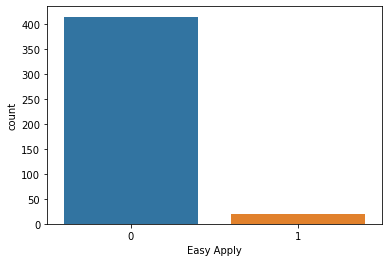

In [59]:
import seaborn as sns
sns.countplot(x=df1['Easy Apply'])

### Over sampling the Minority class via SMOTE

In [60]:
import imblearn
from imblearn.over_sampling import SMOTE

x = df1[['Size','Type of ownership','Sector','Revenue','Rating']]
y = df1['Easy Apply']
samples = SMOTE()
X,Y = samples.fit_resample(x,y)

In [61]:
df2 = pd.DataFrame(X)
df2['Easy Apply'] = Y
df2

,Size,Type of ownership,Sector,Revenue,Rating,Easy Apply
0,5,0,2,3,3.900000,1
1,3,0,11,3,3.700000,1
2,4,1,7,0,4.000000,0
3,1,2,9,6,4.000000,0
4,6,3,4,5,3.800000,0
...,...,...,...,...,...,...
825,2,5,4,4,3.800000,1
826,5,0,4,8,4.500000,1
827,5,0,8,1,3.993461,1
828,4,0,10,2,3.620256,1


Samples are now balanced.

<AxesSubplot:xlabel='Easy Apply', ylabel='count'>

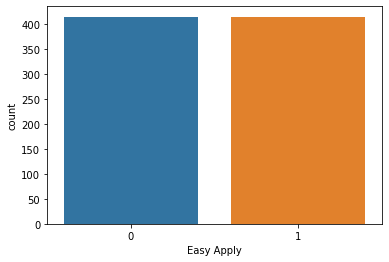

In [62]:
sns.countplot(x=df2['Easy Apply'])

## Model Development

In [63]:
from sklearn.model_selection import train_test_split
x = df2[['Size','Type of ownership','Sector','Revenue','Rating']]
y = df2['Easy Apply']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=5)

### Cross validation - accuracy and Learning curve

In [64]:
from sklearn.model_selection import learning_curve,KFold,cross_val_predict,cross_val_score
fold = KFold(shuffle=True)
def cv_accuracy(estimator,train_size=np.linspace(0.1,1.0,5)):
                        
                        model = cross_val_predict(estimator,x_train,y_train,cv=fold)
                        accuracy1 = cross_val_score(estimator,x_train,y_train,cv=fold)
                        print(accuracy1.mean())
                        train_sizes,train_scores,test_scores = learning_curve(estimator,x_train,y_train,train_sizes=train_size,cv=fold)
                        train_scores_mean = np.mean(train_scores,axis=1)
                        train_scores_std = np.std(train_scores,axis=1)
                        test_scores_mean = np.mean(test_scores,axis=1)
                        test_scores_std = np.std(test_scores,axis=1)
                        plt.plot(train_sizes,train_scores_mean,'o-',color='r',label='Training samples')
                        plt.plot(train_sizes,test_scores_mean,'o-',color='g',label='Test samples')
                        plt.xlabel('Training sizes')
                        plt.ylabel('Error')
                        plt.title('Learning curve')
                        

### Logistic regression

Since the target variable is a feature of probablity, the first option would to choose Logistic regression due to its effective probability feature.

0.8037872089596227


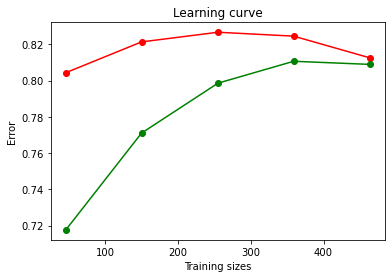

In [65]:
from sklearn.linear_model import LogisticRegression
cv_accuracy(LogisticRegression())

From the cross validation results, the accuracy is around 80%. However, the learning curve indicates a high bias meaning the dataset is undersampled. Hence, Logistic regresion model is not considered.

## Decision Tree Classifier

0.9552313586796345


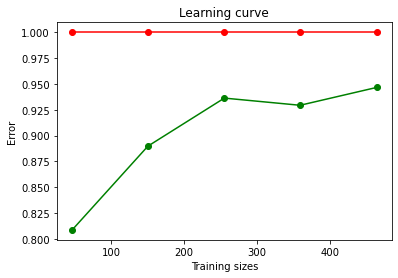

In [66]:
from sklearn.tree import DecisionTreeClassifier
cv_accuracy(DecisionTreeClassifier())

The accuracy is 93% and the learning curve shows a decent gap between the training samples and cross-validation samples. 

### Random Forest Classifier

0.9604479811376363


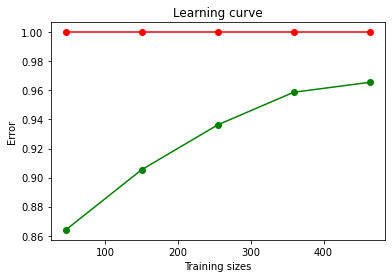

In [67]:
from sklearn.ensemble import RandomForestClassifier
cv_accuracy(RandomForestClassifier())

Among the three models tested in CV, random forest classifier provides highest accuracy of 94%. The learning curve shows low bias and variance.

## Hyper Parameter Tuning

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier()
parm = {'n_estimators':[100,200,300,500],'max_depth':[1,3,5,7]}
grid = GridSearchCV(estimator=rc,param_grid=parm,cv=fold)
    

In [69]:
grid.fit(x_train,y_train)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 3, 5, 7],
                         'n_estimators': [100, 200, 300, 500]})

In [70]:
grid.best_params_

{'max_depth': 7, 'n_estimators': 200}

In [71]:
accuracy1 = cross_val_score(RandomForestClassifier(max_depth=7, n_estimators=300),x_train,y_train,cv=fold)
print(accuracy1.mean())

0.9724874742116121


Based on the Grid search result, the best parameters are maximum depth '7' and the estimator number is 300. Hence, the same is applied to the test samples.

In [72]:
rc = RandomForestClassifier(max_depth=7,n_estimators=300)
rc = rc.fit(x_train,y_train)
yhat = rc.predict(x_test)

## Model Evaluation

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       127
           1       0.95      0.98      0.96       122

    accuracy                           0.96       249
   macro avg       0.96      0.96      0.96       249
weighted avg       0.96      0.96      0.96       249

Accuracy 0.963855421686747


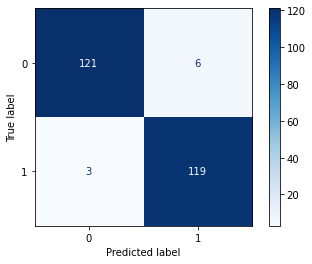

In [73]:
from sklearn.metrics import classification_report,accuracy_score,plot_confusion_matrix
print('Classification Report')
print(classification_report(y_test,yhat))
print('Accuracy',accuracy_score(y_test,yhat))
plot_confusion_matrix(rc,x_test,y_test,cmap='Blues')

Based on the overall evaluation metrics, the model fits for 96

In [74]:
df_output = x_test
df_output['Easy Apply'] = yhat
df_output

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Size,Type of ownership,Sector,Revenue,Rating,Easy Apply
753,2,5,4,4,3.800000,1
767,5,0,4,6,4.208146,1
571,6,0,10,1,3.640342,1
283,1,1,4,4,3.500000,0
193,1,1,7,2,3.900000,0
...,...,...,...,...,...,...
612,3,0,3,6,3.675820,1
50,3,0,9,1,4.100000,0
761,2,5,4,4,3.800000,1
572,1,1,2,4,2.817934,1


In [78]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import imblearn
from imblearn.over_sampling import SMOTE
def Prediction(s,t,s1,r,rating,size,type,sector,revenue):
                                                df5 = pd.DataFrame()
                                                x1 = [[s,t,s1,r,rating]]
                                                df = pd.read_csv('DataAnalyst.csv')
                                                d = df['Company Name']
                                                df[['Company','Rate']] = d.str.split(pat='\n',n=1,expand=True)
                                                df = df.replace(to_replace='\n',value=' ',regex=True)
                                                df['Easy Apply'].replace(to_replace='-1',value='False',inplace=True)
                                                df.replace(to_replace='-1',value=np.nan,inplace=True)
                                                df['Revenue'].replace(to_replace='Unknown / Non-Applicable',value=np.nan,inplace=True)
                                                df['Founded'].replace(to_replace=-1,value=np.nan,inplace=True)
                                                df = df.dropna()
                                                df = df.drop(columns='Unnamed: 0',axis=1)
                                                df = df.reset_index()
                                                df = df.drop(columns='index',axis=1)
                                                
                                                le = LabelEncoder()
                                                col = df[['Size','Type of ownership','Sector','Revenue','Easy Apply']]
                                                df1 = col.apply(lambda x: le.fit_transform(x))
                                                df1['Rating'] = df['Rating']
                                                

                                                x2 = df1[['Size','Type of ownership','Sector','Revenue','Rating']]
                                                y2 = df1['Easy Apply']
                                                samples = SMOTE()
                                                X,Y = samples.fit_resample(x2,y2)
                                                df2 = pd.DataFrame(X)
                                                df2['Easy Apply'] = Y
                                                from sklearn.model_selection import train_test_split
                                                x = df2[['Size','Type of ownership','Sector','Revenue','Rating']]
                                                y = df2['Easy Apply']
                                                x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=5)
                                                rc = RandomForestClassifier(max_depth=7,n_estimators=300)
                                                rc = rc.fit(x_train,y_train)
                                                result = rc.predict(x1)
                                                if result == 1:
                                                                output = 'True'
                                                else:
                                                                output = 'False'
                                                
                                                df5 = df.where((df['Size']==size) & (df['Type of ownership']==type) & (df['Sector']==sector) & (df['Revenue']==revenue) & (df['Rating']==rating) & (df['Easy Apply'] == output))
                                                df5 = df5.dropna()
                                                df6 = df5[['Location','Company','Job Title','Salary Estimate','Rating','Size','Founded','Type of ownership','Industry','Sector','Revenue','Easy Apply']]
                                                df6[['Founded']] = df5[['Founded']].astype(int)
                                                df6['Easy Apply']=df6['Easy Apply'].replace(to_replace='True',value='Yes')
                                                df6['Easy Apply']=df6['Easy Apply'].replace(to_replace='False',value='No')
                                                return df6

In [76]:
Prediction(5,0,2,3,3.9,'501 to 1000 employees','Company - Private','Arts, Entertainment & Recreation','$100 to $500 million (USD)')

FileNotFoundError: [Errno 2] No such file or directory: 'DataAnalyst.csv'